# Neural Networks

## What's a Neural Network

In this lesson, we learn how to create neural networks with one hidden layer. A neural network is a function that can be used to approximate most functions using a set of parameters. Let's look at an example of classification where we overlaid the color over the feature. 

<img src="images/neural_net_points.svg" width="25%"/>

In the context of neural networks its helpful to think of the classification problem as a decision function. Just like a function when $y$ equals one the value is mapped to one on the vertical axis. We can represent the function like a box, this box function is an example of a decision function. Any values of $x$ in the center region is one, any value of $x$ in the other regions is mapped to zero.

<img src="images/box_function.svg" width="25%"/>

Let's build a Neural Network with a few Linear Classifiers. In the example above, we cannot use a straight line to separate the data. We can also view the problem as trying to approximate the box function using logistic regression. The line in the image below can be used to linearly separate some of the data, but some of the data is on the wrong side of the line. We can use the following node to represent the line and the edges to represent the input $x$ and output $z$.

<img src="images/line_1.svg" width="40%"/>

If we apply the logistic function, in the context of neural networks, this is called the activation function. The last values of the function are incorrect and we get an incorrect result in that region. We can represent the sigmoid function with the following node taking the input $z$ from the linear function and producing an output, technically $a$ is a function of $z$ and $x$. We will call the function $a$
the activation function and the output of $a$ is called the activation.

<img src="images/line_2.svg" width="50%"/>

The green or the orange lines can also be used to linearly separate some of the data, but the initial data is on the wrong side of the line. Thus, it looks like it cannot be use to separate the data. 

<img src="images/line_3.svg" width="50%"/>

However, let's see what happens when we apply the sigmoid function. After applying the sigmoid or activation function, we get an incorrect result for most of the samples. 

<img src="images/line_4.svg" width="50%"/>

Consider the following sigmoid functions we call them $a_1$ and $a_2$. If we subtract the second sigmoid function from the first sigmoid function, we get something similar to the decision function. We can also apply the following operations with a linear function, *i.e.* just subtract the second activations from the first activation function. We will use the following graph to represent the the operation, where the $a_1$ and $a_2$ represent the two sigmoid functions.

<img src="images/line_5.svg" width="70%"/>

If we apply a threshold setting every value less than 0.5 is classified as zero and grater than 0.5 is classified as one. Thus, we get the exact function we are trying to approximate. We can use the graph to represent the process, we apply two linear functions to $x$ and we get two outputs. To each linear function we apply a sigmoid, and apply a second linear function to the outputs of the sigmoid. We usually apply another function to the output of this linear function then apply a threshold. This diagram is used to represent a two-layer neural network, with one hidden layer. The second layer is called the output layer. Each linear function and activation is known as an artificial neuron. In this case the hidden layer has two artificial neurons. The output layer has one artificial neuron.

<img src="images/graph.svg" width="50%"/>

As models get more complicated we will use the representation with the non-linear term overlapping the linear term, sometimes we will leave out the bias term. As models get more complicated, we will sometimes only show the number of layers and artificial neurons and drop the parameters. 

Its helpful to look at the outputs of each component of the neural network. The output of the linear component is a 2D plane that looks like this.

<img src="images/plot_z.svg" width="70%"/>

These red data points in the input get mapped to the red points in the 2D plane and the blue data points of the input get mapped to the blue points in the 2D plane and so on. This output is not very insightful. Let's look at the activation, the outputs of the activation function is a 2D plane that looks like the image below, where the red data points in the input get mapped to the red points in the 2D plane, and the blue data points from the input get mapped to the blue points in the 2D plane and so on. It turns out that we can split the point using the orange plane as shown below. This is what the linear function on the second layer does.

<img src="images/plot_a.svg" width="70%"/>

Lets see how to built a neural network in PyTorch. We will need to import the following libraries, in this case we import sigmoid directly. We repeatedly apply linear functions and activation functions. We will call the class `Net`. Let's review the different components for the network we discussed earlier. We use the linear class to represent each layer. The hidden layer is given by the first linear constructor. The output layer is given by the second linear constructor. In the constructor, we start with the size of the input to the network (in this case one), this is used in the constructor to the first linear function in the class or module. In this class `H` is the number of neurons,(in this case two). `H` is also the number inputs to the second linear layer. `D_out` is the size of the output layer.

In [19]:
import torch
import torch.nn as nn
from torch import sigmoid

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = sigmoid(self.linear1(x))
        x = sigmoid(self.linear2(x))
        return x

After we create a neural network object, we can apply it to a tensor as follows. Just like the other methods forward makes the prediction. The linear operation is applied to $x$. The function sigmoid applies a sigmoid function to the two outputs of the first linear function. The second linear function is applied to the output of the two sigmoid functions. The second sigmoid function applies a sigmoid function to the single output of the linear function. The output is then returned. In summary, we apply two linear functions to $x$ and we get two outputs to each linear function we apply a sigmoid. We then apply a second linear function to the outputs of the sigmoid. We usually apply another function to scale the output.

In [11]:
model = Net(1, 2, 1)
x = torch.tensor([[0.0],[0.0]])
yhat = model(x)

Just a note, we can also use Neural networks for regression by simply removing the last sigmoid function and changing the loss function. A neural network is essentially performing matrix multiplication, let's look at the matrix interpretation. As you recall, linear is essentially a matrix. Let's represent the sample $x$ as follows with an orange box. We can interpret the operations as follows in this case our matrix $W$ has 1 row and two columns similar for the bias. The number of columns in the matrix $W$ represents the number of neurons. The number of rows is 1 representing the input size. We will apply a sigmoid to each of the elements of linear, the result is still a two by two tensor. 

<img src="images/sigmoid.svg" width="35%"/>

The second linear applies the matrix operation presented in the second row in the image below. The parameters has 2 rows representing the size of the inputs and 1 column representing the neuron. We then apply a sigmoid function to the output.

<img src="images/nn_complete.svg" width="45%"/>

For multiple samples the process is the same, we can represent it as a matrix operation. The operation is applied to every row in $x$, as a result each row in $z$ represents a sample and each column is the output of the artificial neuron to that particular sample. We then apply the sigmoid output. We then apply the linear function to each row and we get an output for each row. We than apply a sigmoid function to each output, the result is a tensor.

<img src="images/nn_multiple.svg" width="50%"/>

To get a discrete value you will need to apply a threshold. The method state dictionary has the model parameters, we have the parameters for the first linear term as well as and the second linear term. Qe have the parameters for the first linear term and the second linear term.

Let review nn.Sequential. The process for Sequential is the same, we input the linear constructor with the input and output dimensions. We add the sigmoid function, we add the second linear function. We add the final Sigmoid function, we can then apply the model to a tensor.

In [12]:
model = nn.Sequential(torch.nn.Linear(1, 2), torch.nn.Sigmoid(), torch.nn.Linear(2, 1), torch.nn.Sigmoid())
yhat = model(x)

Let's see how to train the model. The training procedure is similar to the other methods. We create the data, we create a training function. In this case we cumulate the loss iteratively to obtain the cost.

In [20]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:,0] > 4) & (X[:,0]<4)] = 1.0

def train(Y, X, model, optimizer, criterion, epochs=10):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item()
        cost.append(total)
    return cost

The process for training is identical to logistic regression, we create a BCE Loss. Then we create the $X$ and $Y$ values for our dataset. We create a our model, we specify two hidden layers, we create an optimizer, then train the model.

In [21]:
criterion = nn.BCELoss()
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:,0] > 4) & (X[:,0]<4)] = 1.0

model = Net(1, 2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
cost = train(Y, X, model, optimizer, criterion, epochs=100)

/home/roger/Installed/anaconda3/envs/dl0110en/lib/python3.6/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


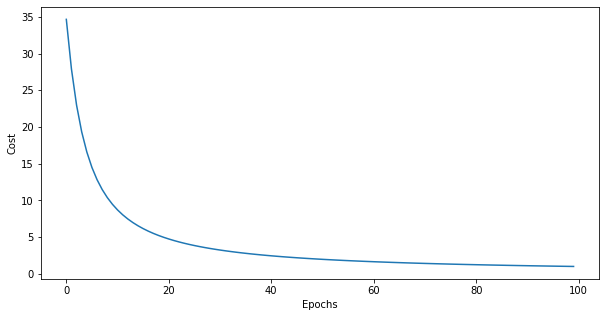

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

## More Hidden Neurons

Now, we learn how adding more neurons in the hidden layer can improve the model. We create a Neural Networks with more Neurons in the hidden layer. Consider the following samples of training set:

<img src="images/example_multiple.svg" width="35%"/>

If we use the same decision function in this example, the samples between -5 and 5 are misclassified.

<img src="images/example_single_neuron.svg" width="35%"/>

Shifting the function will not help, in this case most of these samples are misclassified.

<img src="images/example_shifted.svg" width="35%"/>

Scaling will not help as before the samples between -10 and -5 are misclassified.

<img src="images/example_scaled.svg" width="35%"/>

The model is not flexible enough. Ideally we would like to add another function, we can do this by adding more neurons to the hidden layer.

<img src="images/example_ideal.svg" width="35%"/>

Let's see what happens when we multiply the outputs of the activations by the parameters. Symbolically we are going to look at the activations. Multiply it by the weights and add them together. Let's use images rather then equations to demonstrate what is going on. Let's look at the following neurons, the output of the first neuron multiplied by the weight will give you the following sigmoid function. We then add the output of the second neuron multiplied by the weight followed by the third neuron multiplied by the weight. We repeat the process for the next neuron. Adding it to the rest of the neurons it begins to look similar to what we need. We add the output of the 5th neuron multiplied by the weight. We add the output of the final neuron multiplied by the weight. 

$$
z_1^2 = w_{11}^2 a_1^1(x) + w_{21}^2 a_2^1(x) + w_{31}^2 a_3^1(x) + w_{41}^2 a_4^1(x) + w_{51}^2 a_5^1(x) + w_{61}^2 a_6^1(x)
$$ 

The function has the same shape we require but the vertical axis is off. The issue can be solved by applying the sigmoid function, we see the scaling problem is gone, and the resulting function is a good candidate to classify the data.

<img src="images/multineuron.svg" width="90%"/>

Let's see how to build this network with PyTorch. We will need to import the following libraries.

In [26]:
import torch 
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader

This is the class to get our dataset:

In [33]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10) & (self.x[:,0]<-5)] = 1
        self.y[(self.x[:,0]>5) & (self.x[:,0]<10)] = 1
        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

This is the class for creating our model:

In [28]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = sigmoid(self.linear1(x))  
        x = sigmoid(self.linear2(x))
        return x

We will create a function to train our model, we cumulate the loss iteratively to obtain the cost.

In [47]:
def PlotStuff(X, Y, model, epoch, leg=True):
    if epoch == 0:
        plt.figure(figsize=(10,5))
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

def train(data_set, model, criterion, train_loader, optimizer, epochs=5, plot_number=10):
    cost = []
    for epoch in range(epochs):
        total = 0
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
            if epoch % 300 == 0:
                PlotStuff(data_set.x, data_set.y, model, epoch)
        cost.append(total)
    return cost

The process for training is identical to logistic regression, we create a BCE Loss. We create a dataset and training loader. We create a our model. We specify 6 neurons in the hidden layers, we create an optimizer
with Adam optimizer, then train the model.

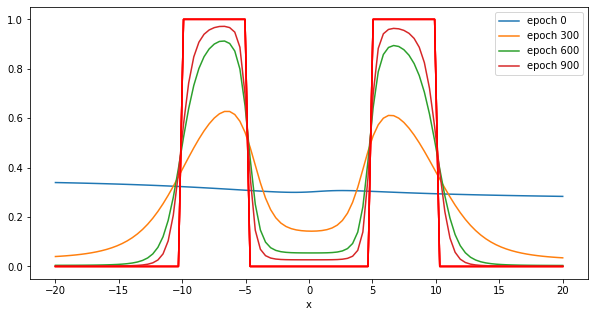

In [48]:
criterion = nn.BCELoss()
data_set = Data()
train_loader = DataLoader(dataset=data_set, batch_size=100)
model = Net(1, 6, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
cost = train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

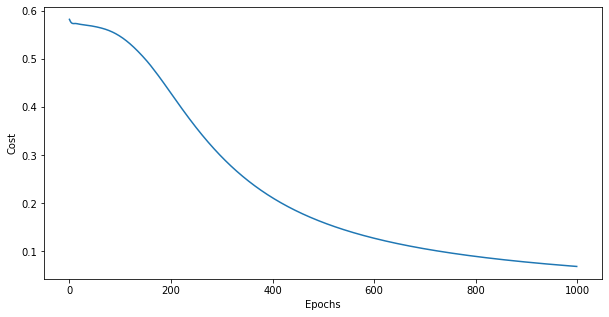

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

## Neural Networks with Multiple Dimension Input

In the last lesson, we learned how we can add more neurons to give our neural network more classification ability. In the same way we can add more dimensions to the input, notice that there are a lot more weights between the input layer and hidden layer - we will leave out the bias terms for now.

<img src="images/multiple_inputs.svg" width="35%"/>

Consider the following samples in two dimensions where the data points are blue for $y=0$, and red for $y=1$. 

<img src="images/example_corners.svg" width="35%"/>

The subsequent line does not separate the two classes. 

<img src="images/nn_1.svg" width="35%"/>

In the same way the following line cannot separate the two classes. 

<img src="images/nn_2.svg" width="35%"/>

Let's look at the problem as a function. In this diagram we use the color to represent the output of the function in the different regions, any point in the red area the function will output 1, and any point in the blue area the function will output 0.

<img src="images/nn_3.svg" width="35%"/>

In this case all the samples in the right down corner are misclassified. Using three neurons we will have a different function, everything in the blue region $\hat{y}=0$, and everything in the red region $\hat{y}=1$. 

<img src="images/nn_4.svg" width="35%"/>

We see the function is not linear, but it still appears that the points in the top left corner are not correctly classified. It appears that four hidden neuron's appear to do the trick. We see that the samples that belong to class zero are in the correct region and the samples that belong to class one are in the correct region.

<img src="images/nn_5.svg" width="35%"/>

Lets tackle the problem of Multiple Dimensional inputs in PyTorch. We will need to import the following libraries.

In [50]:
import torch 
import torch.nn as nn
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader

We will create a data set class as shown in the following below.

In [51]:
class XOR_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

This is the class for creating our model.

In [52]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = sigmoid(self.linear1(x))  
        x = sigmoid(self.linear2(x))
        return x

We will create a function to train our model, we cumulate the loss iteratively to obtain the cost, we also determine the accuracy using a function.

In [58]:
import numpy as np
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    LOSS = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        LOSS.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return LOSS

The process for training is identical to logistic regression on a signal dimension neural network. We create a BCE Loss, we create a dataset object and training loader. We create a our model, we specify two input dimensions and four neurons in the hidden layers. We create an optimizer, then train the model.

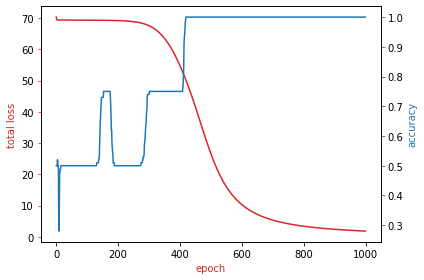

In [60]:
criterion = nn.BCELoss()
data_set = XOR_Data()
train_loader = DataLoader(dataset=data_set, batch_size=1)
model = Net(2, 4, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
cost = train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

We can see as the total loss or cost decreases the accuracy gets better.

Now, we introduce the problem of **overfitting** and **underfitting**. What are the causes of Overfitting? **Overfitting** occurs 
- when the model is too complex for the data
- it occurs when there are too many neurons in the hidden layer.

What are the causes of Underfitting? **Underfitting** occurs 
- when your model cannot capture the complexity of the data
- it occurs when there are too few neurons in the hidden layer.

Lets generate the dataset for our example of overfitting and underfitting. The decision function looks like the image below, where the data points on one side of our decision function are red, and the datapoints on the other side of the decision function are blue. As we can see, some datapoints are on the wrong side of the decision boundary.

<img src="images/decision_boundary.svg" width="45%"/>

In the example below, we generate a decision region using a neural network with too many neurons in the hidden layer, where we can see that our decision region is too complex and misclassifies some of the datapoints.

<img src="images/overfitting.svg" width="45%"/>

In this example we generate a decision region using a neural network with too few neurons in the hidden layer. You can see that our decision region is not complex enough to correctly classify some of the datapoints.

<img src="images/underfitting.svg" width="45%"/>

There are several ways to solve the problem of overfitting and underfitting. For example, 
- Use validation data to determine the optimum number of neurons such that there is not too many neurons or not too few neurons.
- Get more data
- Apply regularization.

## Multi-Class Neural Networks

In this video we will cover Multi-Class Neural Networks. In PyTorch in order to classify multiple classes, you simply set the number of neurons output layer to match the number of classes in the output of the problem. For example, if the output of the problem consists of 3 classes, we should add three neurons to the output layer of your model.

<img src="images/multiple_outputs.svg" width="35%"/>

Each neuron has its own set of parameters and can be expressed as a row in a matrix. Each neuron has as many input parameters as neurons in the previous layer. We did not include the bias here. Let us use colours to represent each neuron in the output layer of the model. Red for neuron 0, blue for neuron 1, and green for neuron 2.

<img src="images/multiple_outputs_color.svg" width="35%"/>

The process to make predictions in multiclass neural networks is similar to using Softmax, which we discussed in the previous modules. To illustrate this, let's start an example with three classes. for an input we will we obtain a value in each of the 3 neurons in the output layer. We choose the class with the neuron that has the largest value as the output of the model. In the example below, neuron two has the largest value, so the output of our model is two.

<img src="images/multiple_outputs_value.svg" width="35%"/>

It's helpful to think of the operation in terms of Softmax regression or a linear transformation. Consider an example where we have four neurons in the hidden layer. We replace the features $x$ with the activations of the neurons from the hidden layer. For each class in the output layer, we have a neuron. The column in the matrix represents each neuron. In this example, as we have three classes, our matrix has three columns. As with other linear transforms, we have three biases. The number of rows in the matrix is the number of neurons in the previous layer. In this case, we have four neurons in the previous layer. As a result, we have four rows in our matrix. To make a prediction for a given input it's similar to using a Softmax classifier. For each class we get an input, we select the index of the column with the largest value as the class, in this case the class is two. We can also apply the SoftMax method for the two class problem. For example, we have two outputs in the output layer of the neural network.

As our models get more complex, we will drop the edges representing the weights and only show the layers and neurons for a simplified overview of the neural network. We have the input vector with $D$ dimensions, followed by the hidden layer, then the output layer.

<img src="images/neural_network.svg" width="35%"/>

Lets make a Multi-Class Neural Network in PyTorch. The Class to construct a neural network is similar to the one that we used previously. The only modification is that we set the number of neurons in the layer to match the number of classes in our problem, and in addition we drop the activation function in the last layer. Like previously, we have the size of the number of input features. We construct a linear object that we called `linear1`, which has the parameter `D_in` representing the input features. This will be used in the forward function. For the second parameter we have the number of neurons in the hidden layer (`H`). This is used as the parameter of our `linear1` and `linear2` object. This will be the number of columns of $x$ in the forward function. `D_out` is the number of classes for our problem. This is the other parameter we use to construct the `linear2` object. In the forward function the output $x$ has as many columns as classes.

In [61]:
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

We could also use the Sequential module to construct our neural network model for the multi class problem, where `input_dim` is the number of input features, `hidden_dim` is the number of neurons in the hidden layer, `output_dim` is the number of classes in the output of the model.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim))

We will create a validation and training data set object. We will create a validation and training loader. We will use the cross entropy function as the criterion for the loss. 

In [66]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Create the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Create the validating dataset
validation_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# Create the criterion function
criterion = nn.CrossEntropyLoss()

The MNIST dataset contains handwritten digits from 0 to 9. We denote the target of the MNIST dataset with the variable `y`, the variable represents the known classes or labels. Since we have 10 classes representing the digits, y can take on the values from 0 to 9.

<img src="images/mnist.svg" width="35%"/>

We convert the image of the handwritten digit to a tensor with 784 dimensions.

<img src="images/mnist_data.svg" width="35%"/>

In the training function we store the training loss and validation accuracy. In this example we calculate the training loss for each iteration. We calculate the accuracy on the validation data for each epoch just like using Softmax by selecting the output with the highest value.

In [67]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (float(correct) / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

When we create model for our neural network, we have the number of input dimensions, the number of hidden neurons. We also input the number of classes, then create the optimizer. We then train the model, we plot the training loss for each iteration and accuracy for each epoch using the validation data.

In [68]:
model = Net(784, 100, 10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

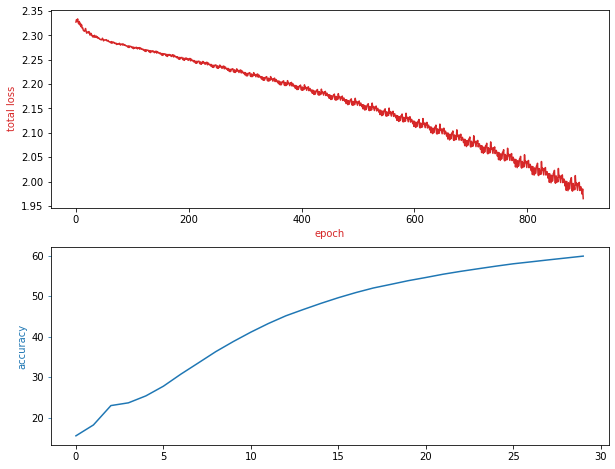

In [86]:
# Plot results
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
color = 'tab:red'
axs[0].plot(training_results['training_loss'], color=color)
axs[0].set_xlabel('epoch', color=color)
axs[0].set_ylabel('total loss', color=color)
color = 'tab:blue'
axs[1].set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
axs[1].plot(training_results['validation_accuracy'], color=color)
axs[1].tick_params(axis='y', color=color)
plt.show()

## Backpropogation

A neural network is a function of another function. The function $z$, is applied to $x$ and then the function $a$, is applied to the function $z$. To help illustrate the process we're going to use these set of gears, where we have the gear $x$ (bottom gear) that rotates at a certain rate and affects the gear $a$ (top right gear). 

<img src="images/LissajousCurvesWithGears.gif" width="30%"/>

There's also an intermediate gear $z$ in a way that the rate of $a$ is affected by $z$, and then by $x$. So the derivative $a$ with respect to $x$, is the derivative of $z$ with respect to $x$ multiplied by the derivative of $a$ with respect to $z$. We call this the chain rule.

$$
\frac{da}{dx} = \frac{da}{dz} \frac{dz}{dx}
$$

Let's take a look at this simple toy example of a neural network with one hidden layer and one output layer. 

<img src="images/nn_oneline.svg" width="70%"/>

We have the cost ($l$), let's look at one sample. 

$$
l(w^1, b^1, w^2, b^2) = \sum\limits_n (y_n - \hat{y}(x_n))^2
$$

We will write the output $\hat{y}$ in terms of the activation.

$$
l(w^1, b^1, w^2, b^2) = (y - a^2(z^2))^2
$$

We have some training data and would like to perform gradient descent to determine the parameters. We need the values of the gradient to perform gradient descent on these two terms.

$$
w^1 = w^1 + \eta \frac{\partial l}{\partial w^1}\hspace{5cm} w^2 = w^2 + \eta \frac{\partial l}{\partial w^2}
$$

So let's calculate the derivative or gradient. We have a loss function - let's just use a squared error in this case.

$$
l(w^1, b^1, w^2, b^2) = (y - a^2(z^2))^2
$$

The derivative of the output layer with respect to our first parameter in the output layer is the derivative of the loss function with respect to the activation on the output layer.

$$
\frac{\partial l}{\partial w^2} = \frac{\partial l}{\partial a^2}
$$

Then we have to take the derivative of the activation with respect to the linear input $z^2$.

$$
\frac{\partial l}{\partial w^2} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2}
$$

Then we'll have to take the derivative of $z^2$ with respect to our parameter.

$$
\frac{\partial l}{\partial w^2} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial w^2}
$$

We now have the derivative of the weight in our output layer. Things get a little more complicated when we want to calculate the derivative of the parameter in the hidden layer. As before we have the derivative of the loss function with respect to the activation on the output layer.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2}
$$

Then we have to take the derivative of the activation with respect to the linear input $z^2$.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2}
$$

But instead of taking the derivative with respect to the first weight, we take the derivative of $z^2$ with respect to the activation of the hidden layer.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial a^1}
$$

We then differentiate the activation of the hidden layer with the linear input $z^1$.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial a^1} \frac{\partial a^1}{\partial z^1}
$$

Finally we differentiate the $z^1$ with respect to our final weight and we get the final expression.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial a^1} \frac{\partial a^1}{\partial z^1} \frac{\partial z^1}{\partial w^1}
$$

Back propagation uses the derivative of the first parameter in the output layer,
to help us calculate the parameter of the next layer. Here's our two equations.

$$
\frac{\partial l}{\partial w^2} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial w^2} \\
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^2} \frac{\partial a^2}{\partial z^2} \frac{\partial z^2}{\partial a^1} \frac{\partial a^1}{\partial z^1} \frac{\partial z^1}{\partial w^1}
$$

We are not interested in the actual equations, but we are just trying to understand the concept. Let's represent similar terms with colors, where we can see these two blue terms are present in the output layer and in the hidden layer.

<img src="images/derivative_1.svg" width="50%"/>

We just replace the two green terms with this red term.

<img src="images/derivative_2.svg" width="50%"/>

We can obtain a computational saving by using the red term from the first equation in the second equation. Let's see what happens when we have a deeper network, with more layers. Let's calculate the gradient of all the terms using colors instead of equations. We have the derivative of the output layer and the subsequent hidden layers with respect to the weights. We can represent the green terms with the dark green term, and we can then use this term in the gradient for the parameter in the preceding layer. We then repeat the process for the next two terms, replacing them with a lighter blue. We then use these terms in the gradient for the weight in the deeper hidden layer. Repeating the process for the final layer with the light yellow term. In the final layer we have the following terms in our gradient.

<img src="images/derivative_3.svg" width="80%"/>

This problem gets much more difficult as we add more layers and neurons. Fortunately, Pytorch takes care of it all for you using the backwards method.

The main problem with building deeper networks is the **Vanishing gradient**. If we look at the expression for updating a parameter it is a product of many gradients. If we look at the gradient of the activation, they are all less than one for any given input. Thus, if any of the inputs are too large the gradient will be near zero, and consequently, the product of these small gradients will be almost zero.

$$
\frac{\partial l}{\partial w^1} \approx 0
$$

Therefore, as we add more layers the gradient will get smaller and smaller. As a result we cannot update the parameter value. 

$$
w^1 = w^1 + 0
$$

To overcome this problem we can change the activation functions or we can learn optimization methods that can help reduce this effect.

## Activation Functions

The first activation function is the **sigmoid function**. 

<img src="images/sigmoid_func.svg" width="60%"/>

Here is the mathematical formula for the sigmoid function.

$$
a(z) = \frac{1}{1+e^{-z}}
$$

It has an upper-bound of 1 and a lower bound of 0. One of the main drawback with using the sigmoid activation function is the vanishing gradient. Let's take the derivative of the sigmoid function. 

$$
\frac{da}{dz} = a(z)(1 - a(z))
$$

When $z=-10$ the derivative of the sigmoid function is 0. 

$$
\frac{da}{dz} = a(z)(1 - a(z)) = a(-10)(1 - a(-10)) \approx 0
$$

When $z=0$, the derivative of the sigmoid function is 0.25. 

$$
\frac{da}{dz} = a(z)(1 - a(z)) = a(0)(1 - a(0)) \approx 0.25
$$

When $z=2.5$, the derivative of the sigmoid function is 0.07. 

$$
\frac{da}{dz} = a(z)(1 - a(z)) = a(2.5)(1 - a(2.5)) \approx 0.07.
$$

If you recall from back propagation the derivative of loss with respect to the weight is given by the following mathematical function.

$$
\frac{\partial l}{\partial w^1} = \frac{\partial l}{\partial a^n} \frac{\partial a^n}{\partial z^n} \ldots \frac{\partial a^1}{\partial z^1} \frac{\partial z^1}{\partial w^1}
$$

The graph below shows the sigmoid function in orange and its derivative in blue.

<img src="images/sigmoid_derivative.svg" width="60%"/>

As the product includes the derivative of a bunch of sigmoid functions, this will contribute to the problem of the vanishing gradient, because the product of numbers less than one will tend to go towards zero.

The **tanh** function is another popular activation function. Its upper-bound is 1, the lower bound is -1. The tanh function is zero-centered, and as a result it has better performance.

<img src="images/tanh.svg" width="60%"/>

The following function shows the derivative of the Tanh function in blue and the tanh function in orange. You can see that except when $z=0$, all the values of the derivative of tanh is less than 1. Ao the tanh function also suffers from the vanishing gradient problem as well.

<img src="images/tanh_derivative.svg" width="60%"/>

Our final activation function is the **rectified linear unit** function or **ReLU** function in short. The value of the ReLU function is 0 when its input is less then zero. 

$$
a(z) = max(0, z)
$$

If the input $z > 0$ the input of the function will equal its output. If the input $z = 5$, the output equals 5. If the input $z = 10$, the output equals 10 otherwise it will equal zero.

<img src="images/relu.svg" width="60%"/>

We will see the gradient is 1 if the input is grater than zero. When the function is less than zero the derivative is zero. Since the derivative of the relu function is 1 for an input greater than zero, the ReLU activation function provides a partial solution to the vanishing gradient problem.

<img src="images/relu_derivative.svg" width="60%"/>

Let's implement the **Sigmoid**, **Tanh**, and **ReLU** activation function in PyTorch. You can implement the Sigmoid function by calling it during the forward pass, taking the linear function as the input.

In [87]:
# Sigmoid Function
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

`Net_Tanh` is our model that implements the **Tanh** activation function. In this case the Tanh function is called during the forward pass, taking the linear function as the input.

In [96]:
class Net_Tanh(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net_Tanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

Finally `Net_ReLU` is our model that implements the ReLU activation function. The ReLU function is called during the forward pass, taking the linear function as the input.

In [97]:
class Net_ReLU(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net_ReLU, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

Now we will learn how to construct the neural network model with the Tanh and ReLU activation function using the `nn.sequential` module. We use the `nn.Tanh` object in `Sequential` constructor. This process is similar for the ReLU.

In [94]:
input_dim = 784
hidden_dim = 100
output_dim = 10

model_Tanh = torch.nn.Sequential(
    torch.nn.Linear(input_dim,hidden_dim),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_dim,output_dim))

model_ReLU = torch.nn.Sequential(
    torch.nn.Linear(input_dim,hidden_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_dim,output_dim))

In [98]:
def plot_results(results):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    color = 'tab:red'
    axs[0].plot(results['training_loss'], color=color)
    axs[0].set_xlabel('epoch', color=color)
    axs[0].set_ylabel('total loss', color=color)
    color = 'tab:blue'
    axs[1].set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    axs[1].plot(results['validation_accuracy'], color=color)
    axs[1].tick_params(axis='y', color=color)
    plt.show()

Let's train a model using the Tanh activation and plot the loss and accuracy of the model.

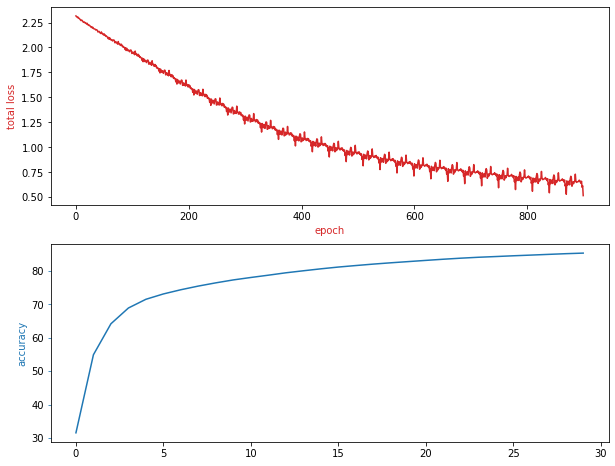

In [101]:
model_tanh = Net_Tanh(784, 100, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=0.01)
training_results_tanh = train(model_tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)
plot_results(training_results_tanh)

Let's train a model using the ReLU activation and plot the loss and accuracy of the model.

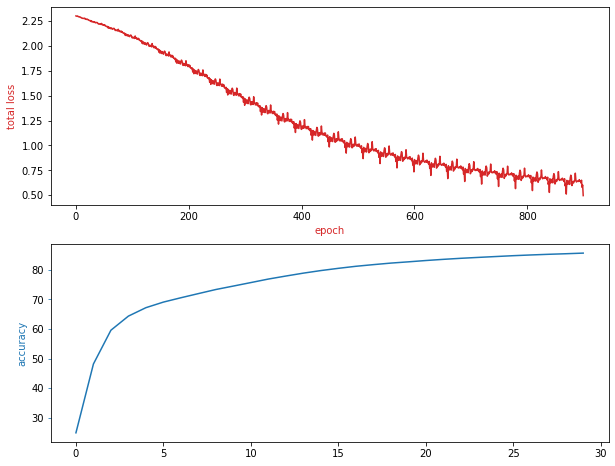

In [100]:
model_relu = Net_ReLU(784, 100, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_relu.parameters(), lr=0.01)
training_results_relu = train(model_relu, criterion, train_loader, validation_loader, optimizer, epochs=30)
plot_results(training_results_relu)

Finally, Let's plot the loss and accuracy for all models in the same plot in order to compare them.

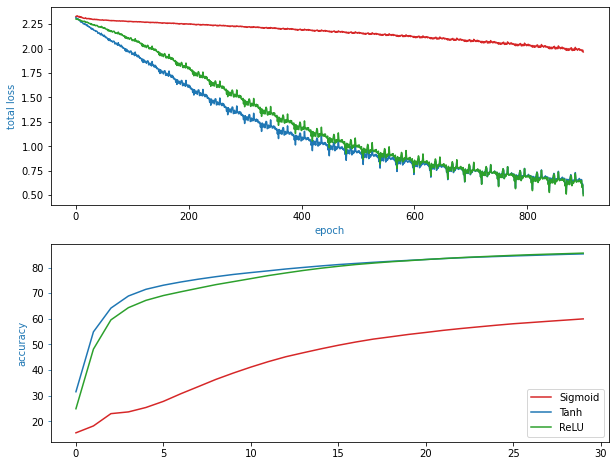

In [105]:
# Comparing all plots

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
color_sigmoid = 'tab:red'
color_tanh = 'tab:blue'
color_relu = 'tab:green'
axs[0].plot(training_results['training_loss'], color=color_sigmoid, label='Sigmoid')
axs[0].plot(training_results_tanh['training_loss'], color=color_tanh, label='Tanh')
axs[0].plot(training_results_relu['training_loss'], color=color_relu, label='ReLU')
axs[0].set_xlabel('epoch', color=color)
axs[0].set_ylabel('total loss', color=color)

color = 'tab:blue'
axs[1].set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
axs[1].plot(training_results['validation_accuracy'], color=color_sigmoid, label='Sigmoid')
axs[1].plot(training_results_tanh['validation_accuracy'], color=color_tanh, label='Tanh')
axs[1].plot(training_results_relu['validation_accuracy'], color=color_relu, label='ReLU')
axs[1].tick_params(axis='y', color=color)
plt.legend()
plt.show()

When examining the loss with respect to iteration, we are able to achieve significantly better performance using the ReLU and Tanh activation functions than with the Sigmoid activation function. Again when examining the validation accuracy with respect to the number of epochs, we are able to achieve significantly better performance using the ReLU and Tanh activation function than with the Sigmoid activation function.